# Pathway choice

Here we explore how to select adequate scenarios for our simulations

In [105]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
from scipy import stats

In [106]:
specie = 'BC'

In [107]:
coords_eu = {
    'lon1': -10,
    'lon2': 25,
    'lat1': 35,
    'lat2': 65
}

In [108]:
coords_wa = {
    'lon1': -20,
    'lon2': 20,
    'lat1': -5,
    'lat2': 20
}

In [109]:
def region_total(emissions, coords):
    emissions_regional = select_region(emissions, coords) 
    return emissions_regional.sum('lat').sum('lon')

def select_region(data, coords):
    return data.sel(lon=slice(coords['lon1'], coords['lon2'])).sel(lat=slice(coords['lat1'], coords['lat2']))

In [110]:
path_ssp126 = '/work/bd1063/b309253/emissions/regional/SSPs_Glb_0.5x0.5_anthro_'+specie+'_SSP126_yearly.nc'
path_ssp245 = '/work/bd1063/b309253/emissions/regional/SSPs_Glb_0.5x0.5_anthro_'+specie+'_SSP245_yearly.nc'
path_ssp370 = '/work/bd1063/b309253/emissions/regional/SSPs_Glb_0.5x0.5_anthro_'+specie+'_SSP370_yearly.nc'
path_ssp460 = '/work/bd1063/b309253/emissions/regional/SSPs_Glb_0.5x0.5_anthro_'+specie+'_SSP460_yearly.nc'
path_ssp585 = '/work/bd1063/b309253/emissions/regional/SSPs_Glb_0.5x0.5_anthro_'+specie+'_SSP585_yearly.nc'

In [111]:
ssp126_eu = region_total(xr.open_dataset(path_ssp126)['s3'], coords_eu)
ssp245_eu = region_total(xr.open_dataset(path_ssp245)['s3'], coords_eu)
ssp370_eu = region_total(xr.open_dataset(path_ssp370)['s3'], coords_eu)
ssp460_eu = region_total(xr.open_dataset(path_ssp460)['s3'], coords_eu)
ssp585_eu = region_total(xr.open_dataset(path_ssp585)['s3'], coords_eu)

In [112]:
ssp126_wa = region_total(xr.open_dataset(path_ssp126)['s3'], coords_wa)
ssp245_wa = region_total(xr.open_dataset(path_ssp245)['s3'], coords_wa)
ssp370_wa = region_total(xr.open_dataset(path_ssp370)['s3'], coords_wa)
ssp460_wa = region_total(xr.open_dataset(path_ssp460)['s3'], coords_wa)
ssp585_wa = region_total(xr.open_dataset(path_ssp585)['s3'], coords_wa)

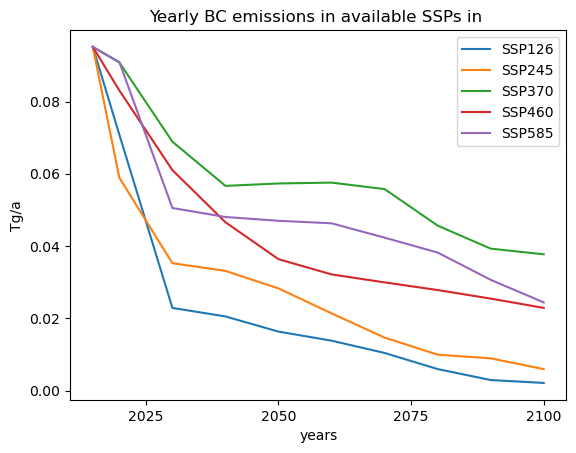

In [113]:
ssp126_eu.plot(label='SSP126')
ssp245_eu.plot(label='SSP245')
ssp370_eu.plot(label='SSP370')
ssp460_eu.plot(label='SSP460')
ssp585_eu.plot(label='SSP585')

plt.title('Yearly '+specie+' emissions in available SSPs in ' )
plt.ylabel('Tg/a')
plt.xlabel('years')
plt.legend(bbox_to_anchor=(1.0, 1.0))

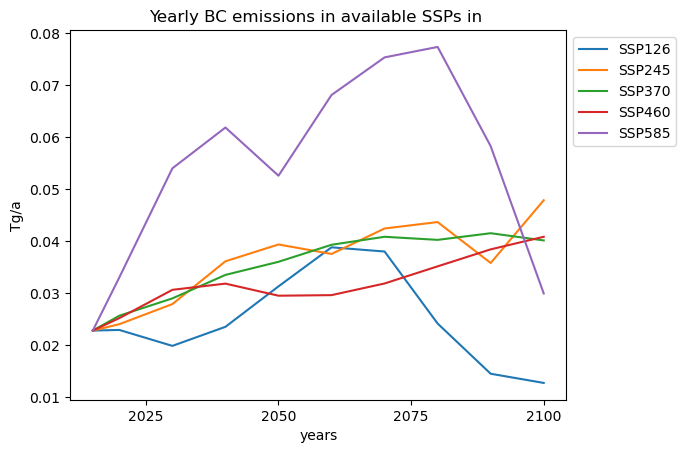

In [114]:
ssp126_wa.plot(label='SSP126')
ssp245_wa.plot(label='SSP245')
ssp370_wa.plot(label='SSP370')
ssp460_wa.plot(label='SSP460')
ssp585_wa.plot(label='SSP585')

plt.title('Yearly '+specie+' emissions in available SSPs in ' )
plt.ylabel('Tg/a')
plt.xlabel('years')
plt.legend(bbox_to_anchor=(1.0, 1.0))

In [115]:
path_ceds = '/work/bd1063/b309253/emissions/regional/CEDS_Glb_0.5x0.5_anthro_'+specie+'__yearly.nc'

In [116]:
ceds_eu = region_total(xr.open_dataset(path_ceds)['transportation'], coords_eu)
ceds_wa = region_total(xr.open_dataset(path_ceds)['transportation'], coords_wa)

In [117]:
# Select the years that overlap with ssp projections
ceds_recentpast_eu = ceds_eu.values[-5:]
ceds_recentpast_wa = ceds_wa.values[-5:]

### We want to linearly 'fill in' the values of the projections between 2015 and 2019 to compare with the data from CEDS

In [118]:
def fill_values(ssp):
    step = (ssp[1] - ssp[0])/5
    return np.arange(ssp[0], ssp[1], step)

In [119]:
ssp126_recentpast_eu = fill_values(ssp126_eu)
ssp245_recentpast_eu = fill_values(ssp245_eu)
ssp370_recentpast_eu = fill_values(ssp370_eu)
ssp460_recentpast_eu = fill_values(ssp460_eu)
ssp585_recentpast_eu = fill_values(ssp585_eu)

In [120]:
ssp126_recentpast_wa = fill_values(ssp126_wa)
ssp245_recentpast_wa = fill_values(ssp245_wa)
ssp370_recentpast_wa = fill_values(ssp370_wa)
ssp460_recentpast_wa = fill_values(ssp460_wa)
ssp585_recentpast_wa = fill_values(ssp585_wa)

# Results

## BC

### Pearson

In [121]:
print('ssp126 eu',stats.pearsonr(ceds_recentpast_eu, ssp126_recentpast_eu)[0])
print('ssp245 eu',stats.pearsonr(ceds_recentpast_eu, ssp245_recentpast_eu)[0])
print('ssp370 eu',stats.pearsonr(ceds_recentpast_eu, ssp370_recentpast_eu)[0])
print('ssp460 eu',stats.pearsonr(ceds_recentpast_eu, ssp460_recentpast_eu)[0])
print('ssp585 eu',stats.pearsonr(ceds_recentpast_eu, ssp585_recentpast_eu)[0])

ssp126 eu 0.9828006235057323
ssp245 eu 0.9828006235057323
ssp370 eu 0.9828006235057323
ssp460 eu 0.9828006235057325
ssp585 eu 0.9828006235057324


In [122]:
print('ssp126 wa',stats.pearsonr(ceds_recentpast_wa, ssp126_recentpast_wa)[0])
print('ssp245 wa',stats.pearsonr(ceds_recentpast_wa, ssp245_recentpast_wa)[0])
print('ssp370 wa',stats.pearsonr(ceds_recentpast_wa, ssp370_recentpast_wa)[0])
print('ssp460 wa',stats.pearsonr(ceds_recentpast_wa, ssp460_recentpast_wa)[0])
print('ssp585 wa',stats.pearsonr(ceds_recentpast_wa, ssp585_recentpast_wa)[0])

ssp126 wa 0.9726647126237182
ssp245 wa 0.9726647126237182
ssp370 wa 0.9726647126237182
ssp460 wa 0.9726647126237181
ssp585 wa 0.9726647126237183


Since we set a linear trend for the projections, this tells us only if the trend is in the right direction

### MAE

In [123]:
print('ssp126 eu', np.mean(np.abs(ceds_recentpast_eu - ssp126_recentpast_eu)))
print('ssp245 eu', np.mean(np.abs(ceds_recentpast_eu - ssp245_recentpast_eu)))
print('ssp370 eu', np.mean(np.abs(ceds_recentpast_eu - ssp370_recentpast_eu)))
print('ssp460 eu', np.mean(np.abs(ceds_recentpast_eu - ssp460_recentpast_eu)))
print('ssp585 eu', np.mean(np.abs(ceds_recentpast_eu - ssp585_recentpast_eu)))

ssp126 eu 0.003722104430198675
ssp245 eu 0.008493548631668086
ssp370 eu 0.004802322387695313
ssp460 eu 0.0023924398422241256
ssp585 eu 0.004843586683273305


In [124]:
print('ssp126 wa', np.mean(np.abs(ceds_recentpast_wa - ssp126_recentpast_wa)))
print('ssp245 wa', np.mean(np.abs(ceds_recentpast_wa - ssp245_recentpast_wa)))
print('ssp370 wa', np.mean(np.abs(ceds_recentpast_wa - ssp370_recentpast_wa)))
print('ssp460 wa', np.mean(np.abs(ceds_recentpast_wa - ssp460_recentpast_wa)))
print('ssp585 wa', np.mean(np.abs(ceds_recentpast_wa - ssp585_recentpast_wa)))

ssp126 wa 0.010855913534760474
ssp245 wa 0.010412186011672021
ssp370 wa 0.00975976325571537
ssp460 wa 0.009944648668169978
ssp585 wa 0.006810969486832616


## CO

### Pearson

In [101]:
print('ssp126 eu',stats.pearsonr(ceds_recentpast_eu, ssp126_recentpast_eu)[0])
print('ssp245 eu',stats.pearsonr(ceds_recentpast_eu, ssp245_recentpast_eu)[0])
print('ssp370 eu',stats.pearsonr(ceds_recentpast_eu, ssp370_recentpast_eu)[0])
print('ssp460 eu',stats.pearsonr(ceds_recentpast_eu, ssp460_recentpast_eu)[0])
print('ssp585 eu',stats.pearsonr(ceds_recentpast_eu, ssp585_recentpast_eu)[0])

ssp126 eu 0.9976597147921483
ssp245 eu 0.9976597147921483
ssp370 eu 0.9976597147921483
ssp460 eu 0.9976597147921483
ssp585 eu -0.9976597147921483


In [102]:
print('ssp126 wa',stats.pearsonr(ceds_recentpast_wa, ssp126_recentpast_wa)[0])
print('ssp245 wa',stats.pearsonr(ceds_recentpast_wa, ssp245_recentpast_wa)[0])
print('ssp370 wa',stats.pearsonr(ceds_recentpast_wa, ssp370_recentpast_wa)[0])
print('ssp460 wa',stats.pearsonr(ceds_recentpast_wa, ssp460_recentpast_wa)[0])
print('ssp585 wa',stats.pearsonr(ceds_recentpast_wa, ssp585_recentpast_wa)[0])

ssp126 wa -0.3331632031908389
ssp245 wa -0.3331632031908389
ssp370 wa 0.3331632031908389
ssp460 wa 0.33316320319083903
ssp585 wa 0.3331632031908389


Since we set a linear trend for the projections, this tells us only if the trend is in the right direction

### MAE

In [103]:
print('ssp126 eu', np.mean(np.abs(ceds_recentpast_eu - ssp126_recentpast_eu)))
print('ssp245 eu', np.mean(np.abs(ceds_recentpast_eu - ssp245_recentpast_eu)))
print('ssp370 eu', np.mean(np.abs(ceds_recentpast_eu - ssp370_recentpast_eu)))
print('ssp460 eu', np.mean(np.abs(ceds_recentpast_eu - ssp460_recentpast_eu)))
print('ssp585 eu', np.mean(np.abs(ceds_recentpast_eu - ssp585_recentpast_eu)))

ssp126 eu 0.3343144416809082
ssp245 eu 0.13074064254760742
ssp370 eu 0.4425194740295403
ssp460 eu 0.2888676643371578
ssp585 eu 0.6886847496032708


In [104]:
print('ssp126 wa', np.mean(np.abs(ceds_recentpast_wa - ssp126_recentpast_wa)))
print('ssp245 wa', np.mean(np.abs(ceds_recentpast_wa - ssp245_recentpast_wa)))
print('ssp370 wa', np.mean(np.abs(ceds_recentpast_wa - ssp370_recentpast_wa)))
print('ssp460 wa', np.mean(np.abs(ceds_recentpast_wa - ssp460_recentpast_wa)))
print('ssp585 wa', np.mean(np.abs(ceds_recentpast_wa - ssp585_recentpast_wa)))

ssp126 wa 0.39245252609252856
ssp245 wa 0.48324823379516635
ssp370 wa 0.10121076583862276
ssp460 wa 0.09289327621459975
ssp585 wa 0.3773989677429199


## NH3

In [81]:
print('ssp126 eu',stats.pearsonr(ceds_recentpast_eu, ssp126_recentpast_eu)[0])
print('ssp245 eu',stats.pearsonr(ceds_recentpast_eu, ssp245_recentpast_eu)[0])
print('ssp370 eu',stats.pearsonr(ceds_recentpast_eu, ssp370_recentpast_eu)[0])
print('ssp460 eu',stats.pearsonr(ceds_recentpast_eu, ssp460_recentpast_eu)[0])
print('ssp585 eu',stats.pearsonr(ceds_recentpast_eu, ssp585_recentpast_eu)[0])

ssp126 eu 0.8909542617519861
ssp245 eu 0.8909542617519861
ssp370 eu -0.8909542617519861
ssp460 eu 0.8909542617519861
ssp585 eu -0.8909542617519862


In [82]:
print('ssp126 wa',stats.pearsonr(ceds_recentpast_wa, ssp126_recentpast_wa)[0])
print('ssp245 wa',stats.pearsonr(ceds_recentpast_wa, ssp245_recentpast_wa)[0])
print('ssp370 wa',stats.pearsonr(ceds_recentpast_wa, ssp370_recentpast_wa)[0])
print('ssp460 wa',stats.pearsonr(ceds_recentpast_wa, ssp460_recentpast_wa)[0])
print('ssp585 wa',stats.pearsonr(ceds_recentpast_wa, ssp585_recentpast_wa)[0])

ssp126 wa -0.9465750631159731
ssp245 wa 0.9465750631159732
ssp370 wa 0.9465750631159733
ssp460 wa 0.9465750631159731
ssp585 wa 0.9465750631159731


Since we set a linear trend for the projections, this tells us only if the trend is in the right direction

## MAE

In [83]:
print('ssp126 eu', np.mean(np.abs(ceds_recentpast_eu - ssp126_recentpast_eu)))
print('ssp245 eu', np.mean(np.abs(ceds_recentpast_eu - ssp245_recentpast_eu)))
print('ssp370 eu', np.mean(np.abs(ceds_recentpast_eu - ssp370_recentpast_eu)))
print('ssp460 eu', np.mean(np.abs(ceds_recentpast_eu - ssp460_recentpast_eu)))
print('ssp585 eu', np.mean(np.abs(ceds_recentpast_eu - ssp585_recentpast_eu)))

ssp126 eu 0.03406133614480496
ssp245 eu 0.0329462643712759
ssp370 eu 0.03602173067629337
ssp460 eu 0.03198880739510059
ssp585 eu 0.03549642004072666


In [84]:
print('ssp126 wa', np.mean(np.abs(ceds_recentpast_wa - ssp126_recentpast_wa)))
print('ssp245 wa', np.mean(np.abs(ceds_recentpast_wa - ssp245_recentpast_wa)))
print('ssp370 wa', np.mean(np.abs(ceds_recentpast_wa - ssp370_recentpast_wa)))
print('ssp460 wa', np.mean(np.abs(ceds_recentpast_wa - ssp460_recentpast_wa)))
print('ssp585 wa', np.mean(np.abs(ceds_recentpast_wa - ssp585_recentpast_wa)))

ssp126 wa 0.00015095469716470692
ssp245 wa 0.0002100603858707473
ssp370 wa 0.00020179832063149655
ssp460 wa 0.00016882521740626543
ssp585 wa 0.00023732122208457444


## NOx

In [61]:
print('ssp126 eu',stats.pearsonr(ceds_recentpast_eu, ssp126_recentpast_eu)[0])
print('ssp245 eu',stats.pearsonr(ceds_recentpast_eu, ssp245_recentpast_eu)[0])
print('ssp370 eu',stats.pearsonr(ceds_recentpast_eu, ssp370_recentpast_eu)[0])
print('ssp460 eu',stats.pearsonr(ceds_recentpast_eu, ssp460_recentpast_eu)[0])
print('ssp585 eu',stats.pearsonr(ceds_recentpast_eu, ssp585_recentpast_eu)[0])

ssp126 eu 0.9867274428866135
ssp245 eu 0.9867274428866133
ssp370 eu 0.9867274428866135
ssp460 eu 0.9867274428866135
ssp585 eu 0.9867274428866133


In [62]:
print('ssp126 wa',stats.pearsonr(ceds_recentpast_wa, ssp126_recentpast_wa)[0])
print('ssp245 wa',stats.pearsonr(ceds_recentpast_wa, ssp245_recentpast_wa)[0])
print('ssp370 wa',stats.pearsonr(ceds_recentpast_wa, ssp370_recentpast_wa)[0])
print('ssp460 wa',stats.pearsonr(ceds_recentpast_wa, ssp460_recentpast_wa)[0])
print('ssp585 wa',stats.pearsonr(ceds_recentpast_wa, ssp585_recentpast_wa)[0])

ssp126 wa 0.9550485147725707
ssp245 wa -0.9550485147725706
ssp370 wa 0.9550485147725707
ssp460 wa 0.9550485147725707
ssp585 wa 0.9550485147725706


Since we set a linear trend for the projections, this tells us only if the trend is in the right direction

## MAE

In [63]:
print('ssp126 eu', np.mean(np.abs(ceds_recentpast_eu - ssp126_recentpast_eu)))
print('ssp245 eu', np.mean(np.abs(ceds_recentpast_eu - ssp245_recentpast_eu)))
print('ssp370 eu', np.mean(np.abs(ceds_recentpast_eu - ssp370_recentpast_eu)))
print('ssp460 eu', np.mean(np.abs(ceds_recentpast_eu - ssp460_recentpast_eu)))
print('ssp585 eu', np.mean(np.abs(ceds_recentpast_eu - ssp585_recentpast_eu)))

ssp126 eu 0.15629916191101073
ssp245 eu 0.1822908878326414
ssp370 eu 0.07202654838562025
ssp460 eu 0.06561412811279262
ssp585 eu 0.09936375617980957


In [64]:
print('ssp126 wa', np.mean(np.abs(ceds_recentpast_wa - ssp126_recentpast_wa)))
print('ssp245 wa', np.mean(np.abs(ceds_recentpast_wa - ssp245_recentpast_wa)))
print('ssp370 wa', np.mean(np.abs(ceds_recentpast_wa - ssp370_recentpast_wa)))
print('ssp460 wa', np.mean(np.abs(ceds_recentpast_wa - ssp460_recentpast_wa)))
print('ssp585 wa', np.mean(np.abs(ceds_recentpast_wa - ssp585_recentpast_wa)))

ssp126 wa 0.04113332629203796
ssp245 wa 0.058743327856063884
ssp370 wa 0.029912585020065264
ssp460 wa 0.03144819140434267
ssp585 wa 0.019639555215835536


# OC

In [42]:
print('ssp126 eu',stats.pearsonr(ceds_recentpast_eu, ssp126_recentpast_eu)[0])
print('ssp245 eu',stats.pearsonr(ceds_recentpast_eu, ssp245_recentpast_eu)[0])
print('ssp370 eu',stats.pearsonr(ceds_recentpast_eu, ssp370_recentpast_eu)[0])
print('ssp460 eu',stats.pearsonr(ceds_recentpast_eu, ssp460_recentpast_eu)[0])
print('ssp585 eu',stats.pearsonr(ceds_recentpast_eu, ssp585_recentpast_eu)[0])

ssp126 eu 0.980242283552304
ssp245 eu 0.980242283552304
ssp370 eu 0.9802422835523039
ssp460 eu -0.9802422835523039
ssp585 eu -0.9802422835523039


In [43]:
print('ssp126 wa',stats.pearsonr(ceds_recentpast_wa, ssp126_recentpast_wa)[0])
print('ssp245 wa',stats.pearsonr(ceds_recentpast_wa, ssp245_recentpast_wa)[0])
print('ssp370 wa',stats.pearsonr(ceds_recentpast_wa, ssp370_recentpast_wa)[0])
print('ssp460 wa',stats.pearsonr(ceds_recentpast_wa, ssp460_recentpast_wa)[0])
print('ssp585 wa',stats.pearsonr(ceds_recentpast_wa, ssp585_recentpast_wa)[0])

ssp126 wa -0.9568160799939274
ssp245 wa -0.9568160799939274
ssp370 wa 0.9568160799939274
ssp460 wa 0.9568160799939271
ssp585 wa 0.9568160799939271


Since we set a linear trend for the projections, this tells us only if the trend is in the right direction

## MAE

In [44]:
print('ssp126 eu', np.mean(np.abs(ceds_recentpast_eu - ssp126_recentpast_eu)))
print('ssp245 eu', np.mean(np.abs(ceds_recentpast_eu - ssp245_recentpast_eu)))
print('ssp370 eu', np.mean(np.abs(ceds_recentpast_eu - ssp370_recentpast_eu)))
print('ssp460 eu', np.mean(np.abs(ceds_recentpast_eu - ssp460_recentpast_eu)))
print('ssp585 eu', np.mean(np.abs(ceds_recentpast_eu - ssp585_recentpast_eu)))

ssp126 eu 0.0034716360270976966
ssp245 eu 0.006175009161233908
ssp370 eu 0.004847963303327552
ssp460 eu 0.005113079994916924
ssp585 eu 0.007370557636022579


In [45]:
print('ssp126 wa', np.mean(np.abs(ceds_recentpast_wa - ssp126_recentpast_wa)))
print('ssp245 wa', np.mean(np.abs(ceds_recentpast_wa - ssp245_recentpast_wa)))
print('ssp370 wa', np.mean(np.abs(ceds_recentpast_wa - ssp370_recentpast_wa)))
print('ssp460 wa', np.mean(np.abs(ceds_recentpast_wa - ssp460_recentpast_wa)))
print('ssp585 wa', np.mean(np.abs(ceds_recentpast_wa - ssp585_recentpast_wa)))

ssp126 wa 0.004120445437729358
ssp245 wa 0.004597351886332033
ssp370 wa 0.00335614290088415
ssp460 wa 0.0015909470990300185
ssp585 wa 0.002333002351224424


## SO2

In [19]:
print('ssp126 eu',stats.pearsonr(ceds_recentpast_eu, ssp126_recentpast_eu)[0])
print('ssp245 eu',stats.pearsonr(ceds_recentpast_eu, ssp245_recentpast_eu)[0])
print('ssp370 eu',stats.pearsonr(ceds_recentpast_eu, ssp370_recentpast_eu)[0])
print('ssp460 eu',stats.pearsonr(ceds_recentpast_eu, ssp460_recentpast_eu)[0])
print('ssp585 eu',stats.pearsonr(ceds_recentpast_eu, ssp585_recentpast_eu)[0])

ssp126 eu -0.8880639532330912
ssp245 eu -0.8880639532330912
ssp370 eu 0.8880639532330912
ssp460 eu -0.8880639532330914
ssp585 eu -0.8880639532330914


In [22]:
print('ssp126 wa',stats.pearsonr(ceds_recentpast_wa, ssp126_recentpast_wa)[0])
print('ssp245 wa',stats.pearsonr(ceds_recentpast_wa, ssp245_recentpast_wa)[0])
print('ssp370 wa',stats.pearsonr(ceds_recentpast_wa, ssp370_recentpast_wa)[0])
print('ssp460 wa',stats.pearsonr(ceds_recentpast_wa, ssp460_recentpast_wa)[0])
print('ssp585 wa',stats.pearsonr(ceds_recentpast_wa, ssp585_recentpast_wa)[0])

ssp126 wa -0.9900271062887032
ssp245 wa -0.9900271062887032
ssp370 wa 0.990027106288703
ssp460 wa 0.9900271062887032
ssp585 wa 0.9900271062887032


Since we set a linear trend for the projections, this tells us only if the trend is in the right direction

## MAE

In [23]:
print('ssp126 eu', np.mean(np.abs(ceds_recentpast_eu - ssp126_recentpast_eu)))
print('ssp245 eu', np.mean(np.abs(ceds_recentpast_eu - ssp245_recentpast_eu)))
print('ssp370 eu', np.mean(np.abs(ceds_recentpast_eu - ssp370_recentpast_eu)))
print('ssp460 eu', np.mean(np.abs(ceds_recentpast_eu - ssp460_recentpast_eu)))
print('ssp585 eu', np.mean(np.abs(ceds_recentpast_eu - ssp585_recentpast_eu)))

ssp126 wa 0.01895322799682616
ssp245 wa 0.01734040677547454
ssp370 wa 0.009080237150192261
ssp460 wa 0.013976210355758656
ssp585 wa 0.012740185856819153


In [24]:
print('ssp126 wa', np.mean(np.abs(ceds_recentpast_wa - ssp126_recentpast_wa)))
print('ssp245 wa', np.mean(np.abs(ceds_recentpast_wa - ssp245_recentpast_wa)))
print('ssp370 wa', np.mean(np.abs(ceds_recentpast_wa - ssp370_recentpast_wa)))
print('ssp460 wa', np.mean(np.abs(ceds_recentpast_wa - ssp460_recentpast_wa)))
print('ssp585 wa', np.mean(np.abs(ceds_recentpast_wa - ssp585_recentpast_wa)))

ssp126 wa 0.026111802458763135
ssp245 wa 0.047006168961524965
ssp370 wa 0.021110220253467572
ssp460 wa 0.019767563045024868
ssp585 wa 0.02138192802667619
